In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import os
from patchify import patchify  
import random
from scipy import ndimage
from PIL import Image
from datasets import Dataset

In [2]:
image_folder = "/Users/asad/Documents/pcbdata/Unet_single_component/SAM_BTN/images"
mask_folder = "/Users/asad/Documents/pcbdata/Unet_single_component/SAM_BTN/masks"

In [3]:
image_filenames = [filename for filename in os.listdir(image_folder) if filename.endswith(('.jpg', '.jpeg', '.png'))]

# Define the target size
target_size = (256, 256)

# Create lists to store the loaded images and masks
images = []
masks = []

# Load images and masks
for image_filename in image_filenames:
    # Load the image
    image_path = os.path.join(image_folder, image_filename)
    with Image.open(image_path) as image:
        # Resize image using bilinear interpolation
        image = image.resize(target_size, Image.BILINEAR)
        # Convert image to numpy array and append to images list
        images.append(np.array(image))

    # Load the corresponding mask
    mask_filename = image_filename.replace("_image.png", "_mask.png")
    mask_path = os.path.join(mask_folder, mask_filename)
    with Image.open(mask_path) as mask:
        # Resize mask using bilinear interpolation
        mask = mask.resize(target_size, Image.BILINEAR)
        # Convert mask to binary format and append to masks list
        mask = (np.array(mask) / 255.0).astype(np.uint8)
        masks.append(mask)

# Convert lists to numpy arrays
cropped_images = np.array(images)
cropped_masks = np.array(masks)

In [4]:
cropped_images.shape

(116, 256, 256, 3)

In [5]:
type(cropped_masks[0])

numpy.ndarray

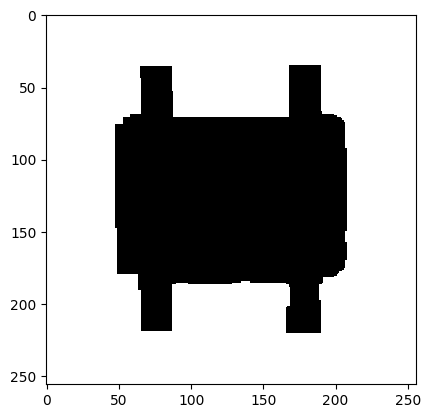

In [6]:
import matplotlib.pyplot as plt
m1 = cropped_masks[0]
plt.imshow(m1, cmap='binary', interpolation='nearest')
plt.show()

In [7]:
# m1 = cropped_masks[0]

# # Counting occurrences of 0s and 1s
# num_zeros = np.count_nonzero(np.isclose(m1, 0, atol=1e-6))
# num_ones = np.count_nonzero(np.isclose(m1, 255, atol=1e-6))
# # num_ones = np.count_nonzero(np.isclose(m1, 1, atol=1e-6))

# # Print the counts
# print("Number of 0s in the mask:", num_zeros)
# print("Number of 1s in the mask:", num_ones)

m1 = cropped_masks[0]

# Counting occurrences of 0s and 1s
num_zeros = np.count_nonzero(m1 == 0)
num_ones = np.count_nonzero(m1 == 1)

# Print the counts
print("Number of 0s in the mask:", num_zeros)
print("Number of 1s in the mask:", num_ones)

Number of 0s in the mask: 44320
Number of 1s in the mask: 21216


In [8]:
m1 = cropped_masks[2]
for row in m1:
    print(row)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [9]:
valid_indices = [i for i, mask in enumerate(cropped_masks) if mask.max() != 0]
filtered_images = cropped_images[valid_indices]
filtered_masks = cropped_masks[valid_indices]
print("Image shape:", filtered_images.shape)  
print("Mask shape:", filtered_masks.shape)

Image shape: (116, 256, 256, 3)
Mask shape: (116, 256, 256)


In [10]:
from datasets import Dataset
from PIL import Image

dataset_dict = {
    "image": [Image.fromarray(img) for img in filtered_images],
    "label": [Image.fromarray(mask) for mask in filtered_masks],
}

dataset = Dataset.from_dict(dataset_dict)

In [11]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 116
})

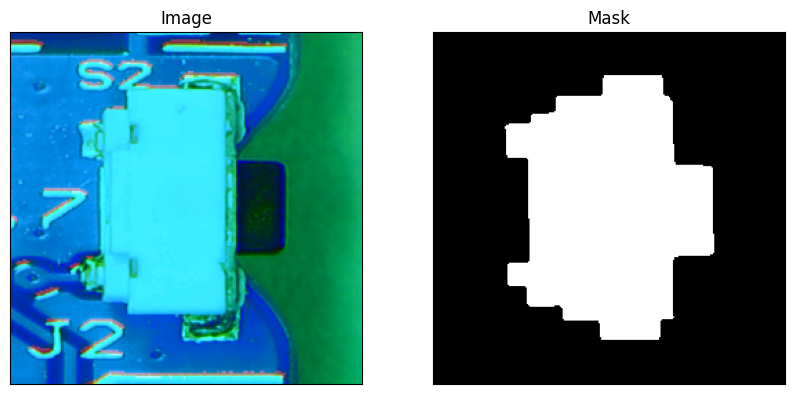

In [12]:
img_num = random.randint(0, filtered_images.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["label"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.array(example_image), cmap='gray')  
axes[0].set_title("Image")

axes[1].imshow(example_mask, cmap='gray')
axes[1].set_title("Mask")

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()

In [13]:
def get_bounding_box(ground_truth_map):

  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)

  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]

  return bbox

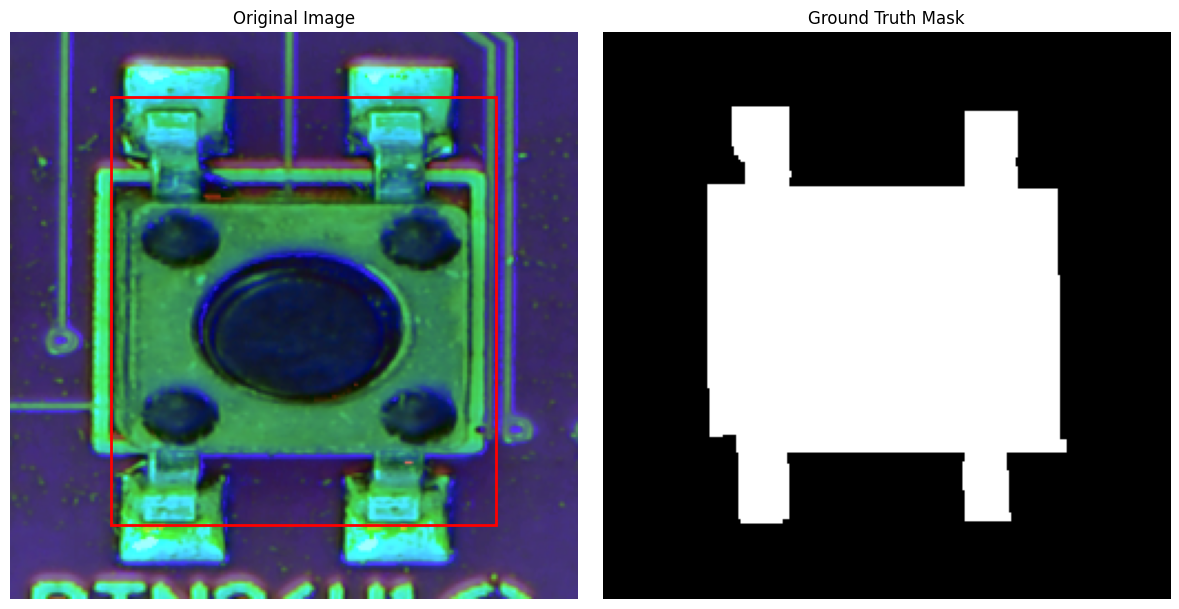

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_bounding_boxes(image, ground_truth_mask, bbox):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(ground_truth_mask, cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    axes[1].axis('off')

    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], linewidth=2, edgecolor='r', facecolor='none')

    axes[0].add_patch(rect)

    plt.tight_layout()
    plt.show()

idx = random.randint(0, len(dataset) - 1)
sample = dataset[idx]

image = np.array(sample['image'])
ground_truth_mask = np.array(sample['label'])  

bbox = get_bounding_box(ground_truth_mask)

visualize_bounding_boxes(image, ground_truth_mask, bbox)

In [15]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
    """
    This class is used to create a dataset that serves input images and masks.
    It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
    """
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item["image"]
        ground_truth_mask = np.array(item["label"])

        # if image.mode == "L":
        #     image = image.convert("RGB")

        prompt = get_bounding_box(ground_truth_mask)

        inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

        inputs = {k:v.squeeze(0) for k,v in inputs.items()}

        inputs["ground_truth_mask"] = ground_truth_mask

        return inputs

In [16]:
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [17]:
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [18]:
example = train_dataset[0]
for k,v in example.items():
  print(k, v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([1, 4])
ground_truth_mask (256, 256)


In [19]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)

In [20]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
input_boxes torch.Size([2, 1, 4])
ground_truth_mask torch.Size([2, 256, 256])


In [21]:
batch["ground_truth_mask"].shape

torch.Size([2, 256, 256])

In [22]:
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

In [23]:
from torch.optim import Adam
import monai

optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)

seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [26]:
from tqdm import tqdm
from statistics import mean
import torch
from sklearn.metrics import f1_score, precision_score, recall_score

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

num_epochs = 100

model.to(device)
model.train()

for epoch in range(num_epochs):
    epoch_losses = []
    epoch_accuracies = []
    epoch_f1_scores = []
    epoch_precisions = []
    epoch_recalls = []

    for batch in tqdm(train_dataloader):
        # Move input data to the device
        pixel_values = batch["pixel_values"].to(device)
        ground_truth_masks = batch["ground_truth_mask"].to(device)

        # Extract input_boxes and convert to float32
        input_boxes = batch["input_boxes"]
        input_boxes = input_boxes.float().to(device)

        # Forward pass
        outputs = model(pixel_values=pixel_values, input_boxes=input_boxes, multimask_output=False)

        # Compute loss
        predicted_masks = outputs.pred_masks.squeeze(1)
        loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1).float())

        # Compute accuracy
        predicted_masks_binary = (predicted_masks > 0.5).float()
        accuracy = (predicted_masks_binary == ground_truth_masks).float().mean()

        # Convert tensors to numpy arrays for metric calculations
        ground_truth_masks_np = ground_truth_masks.cpu().numpy().flatten()
        predicted_masks_binary_np = predicted_masks_binary.cpu().numpy().flatten()

        # Compute precision, recall, and F1 score
        precision = precision_score(ground_truth_masks_np, predicted_masks_binary_np, zero_division=0)
        recall = recall_score(ground_truth_masks_np, predicted_masks_binary_np, zero_division=0)
        f1 = f1_score(ground_truth_masks_np, predicted_masks_binary_np, zero_division=0)

        # Backward pass (compute gradients of parameters w.r.t. loss)
        optimizer.zero_grad()
        loss.backward()

        # Optimize
        optimizer.step()

        epoch_losses.append(loss.item())
        epoch_accuracies.append(accuracy.item())
        epoch_precisions.append(precision)
        epoch_recalls.append(recall)
        epoch_f1_scores.append(f1)

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')
    print(f'Mean accuracy: {mean(epoch_accuracies)}')
    print(f'Mean precision: {mean(epoch_precisions)}')
    print(f'Mean recall: {mean(epoch_recalls)}')
    print(f'Mean F1 score: {mean(epoch_f1_scores)}')


100%|███████████████████████████████████████████| 58/58 [01:20<00:00,  1.39s/it]


EPOCH: 0
Mean loss: 0.1346232044542658
Mean accuracy: 0.925298625025256
Mean precision: 0.9575436432251292
Mean recall: 0.923447320025804
Mean F1 score: 0.93984920829459


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 1
Mean loss: 0.11945041281909778
Mean accuracy: 0.9349761173642915
Mean precision: 0.9599399736127695
Mean recall: 0.9357756541896886
Mean F1 score: 0.9474910507758353


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 2
Mean loss: 0.10975021753331711
Mean accuracy: 0.9300733105889682
Mean precision: 0.9619924519997157
Mean recall: 0.9419236805554734
Mean F1 score: 0.9516474697787856


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 3
Mean loss: 0.10579579413450997
Mean accuracy: 0.9334151169349407
Mean precision: 0.9652204609393611
Mean recall: 0.9400667065597165
Mean F1 score: 0.952281445343246


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 4
Mean loss: 0.09978755653418343
Mean accuracy: 0.9325783828209186
Mean precision: 0.966460828266454
Mean recall: 0.9456940084634998
Mean F1 score: 0.9558568934790137


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 5
Mean loss: 0.09707894895611138
Mean accuracy: 0.9387468798407193
Mean precision: 0.9683541093476872
Mean recall: 0.9449494945636402
Mean F1 score: 0.9563356830738543


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 6
Mean loss: 0.09558040571623835
Mean accuracy: 0.9367470576845366
Mean precision: 0.9670946288094434
Mean recall: 0.9487974769136254
Mean F1 score: 0.9577492837799579


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 7
Mean loss: 0.09131941995744047
Mean accuracy: 0.9339147107354526
Mean precision: 0.969436351102711
Mean recall: 0.948533648935951
Mean F1 score: 0.9587581079416645


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 8
Mean loss: 0.09038503127622194
Mean accuracy: 0.9397527760472791
Mean precision: 0.9690856634510856
Mean recall: 0.9508483271176861
Mean F1 score: 0.9597818708392842


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 9
Mean loss: 0.08803742565214634
Mean accuracy: 0.9350676700986665
Mean precision: 0.9707782699440493
Mean recall: 0.9500177860998528
Mean F1 score: 0.960199224154359


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 10
Mean loss: 0.08501332638592556
Mean accuracy: 0.941027542640423
Mean precision: 0.9713685593545303
Mean recall: 0.9527036555416608
Mean F1 score: 0.9618789943475835


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 11
Mean loss: 0.08290669559661684
Mean accuracy: 0.9365592167295259
Mean precision: 0.9726418445855461
Mean recall: 0.9528501124738674
Mean F1 score: 0.962569785571396


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.36s/it]


EPOCH: 12
Mean loss: 0.08360079913560686
Mean accuracy: 0.937396477008688
Mean precision: 0.9721068035434556
Mean recall: 0.9527241100117052
Mean F1 score: 0.962223810531796


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 13
Mean loss: 0.08182443273735457
Mean accuracy: 0.938293325489965
Mean precision: 0.9720584173369503
Mean recall: 0.9549219685179404
Mean F1 score: 0.9633438575044636


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 14
Mean loss: 0.08057327196002007
Mean accuracy: 0.93704263095198
Mean precision: 0.973356306554862
Mean recall: 0.954309944400709
Mean F1 score: 0.9636351925227511


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 15
Mean loss: 0.07879704500323739
Mean accuracy: 0.9360133203966864
Mean precision: 0.9739377568643198
Mean recall: 0.9561829435852581
Mean F1 score: 0.9649248490656404


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.34s/it]


EPOCH: 16
Mean loss: 0.07811345423346963
Mean accuracy: 0.9395475716426455
Mean precision: 0.9743025857395761
Mean recall: 0.956037339811137
Mean F1 score: 0.9650175269070976


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 17
Mean loss: 0.07635698493184714
Mean accuracy: 0.9387770027949892
Mean precision: 0.9734403210657231
Mean recall: 0.9583003844509549
Mean F1 score: 0.9657582530475534


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 18
Mean loss: 0.07557174389989212
Mean accuracy: 0.9407548575565733
Mean precision: 0.975384191885941
Mean recall: 0.9567478506989484
Mean F1 score: 0.9659112309095182


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 19
Mean loss: 0.07415645087844339
Mean accuracy: 0.9410080745302397
Mean precision: 0.9750952844833742
Mean recall: 0.9587299078872931
Mean F1 score: 0.9668024366930528


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 20
Mean loss: 0.07265203279154055
Mean accuracy: 0.9392602854761584
Mean precision: 0.975872713748902
Mean recall: 0.959064055262827
Mean F1 score: 0.9673539331312097


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 21
Mean loss: 0.07251047619200986
Mean accuracy: 0.9405595187483162
Mean precision: 0.9757155285334331
Mean recall: 0.9600999669682533
Mean F1 score: 0.9678047502597079


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 22
Mean loss: 0.07266896083180246
Mean accuracy: 0.9406052951155037
Mean precision: 0.9763673331720789
Mean recall: 0.9582792318081044
Mean F1 score: 0.9671671782634513


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 23
Mean loss: 0.07093714588675006
Mean accuracy: 0.9417710139833647
Mean precision: 0.9762350069756836
Mean recall: 0.9608472429081869
Mean F1 score: 0.9684388464333096


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 24
Mean loss: 0.0704103665233686
Mean accuracy: 0.943615485881937
Mean precision: 0.976877608011093
Mean recall: 0.9600030679581116
Mean F1 score: 0.9683046235119702


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 25
Mean loss: 0.06998979486525059
Mean accuracy: 0.9417502304603314
Mean precision: 0.9767547802663983
Mean recall: 0.9608025430158497
Mean F1 score: 0.9686737301837587


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 26
Mean loss: 0.06926563491338286
Mean accuracy: 0.9382392620218212
Mean precision: 0.97723423318102
Mean recall: 0.9609583279333164
Mean F1 score: 0.9689958110397805


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 27
Mean loss: 0.06859172219089393
Mean accuracy: 0.9401442429115032
Mean precision: 0.9768616052500345
Mean recall: 0.9619240628256388
Mean F1 score: 0.969297215710203


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 28
Mean loss: 0.06827722207225602
Mean accuracy: 0.9389013093093346
Mean precision: 0.9775330353400354
Mean recall: 0.9611690332393973
Mean F1 score: 0.969230405934443


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 29
Mean loss: 0.06721190125520887
Mean accuracy: 0.9378994908826105
Mean precision: 0.9781519578091493
Mean recall: 0.9616946828721156
Mean F1 score: 0.969807007226976


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 30
Mean loss: 0.06544365130107978
Mean accuracy: 0.9427533642999057
Mean precision: 0.9784721218275436
Mean recall: 0.9629935102681518
Mean F1 score: 0.9706417255180724


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 31
Mean loss: 0.06486946145265267
Mean accuracy: 0.9398599821945717
Mean precision: 0.978354055177457
Mean recall: 0.9634097013086474
Mean F1 score: 0.9707989119620819


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 32
Mean loss: 0.06487424164239702
Mean accuracy: 0.9402926214810076
Mean precision: 0.9784767378396926
Mean recall: 0.9635781194505058
Mean F1 score: 0.9709459426292768


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 33
Mean loss: 0.0636031518465486
Mean accuracy: 0.9384762994174299
Mean precision: 0.9793216677067036
Mean recall: 0.9641226561204319
Mean F1 score: 0.9716285069216893


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 34
Mean loss: 0.0634438507258892
Mean accuracy: 0.9434177793305496
Mean precision: 0.9787538928768945
Mean recall: 0.9646327625992421
Mean F1 score: 0.9716062067958574


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 35
Mean loss: 0.06228900431045171
Mean accuracy: 0.946856663144868
Mean precision: 0.9795116606744486
Mean recall: 0.9650153734254872
Mean F1 score: 0.9721797685056297


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 36
Mean loss: 0.06205388062216084
Mean accuracy: 0.9418453348094019
Mean precision: 0.9793341767649049
Mean recall: 0.9654509315746469
Mean F1 score: 0.9723090873360385


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 37
Mean loss: 0.06253010085944471
Mean accuracy: 0.939398009201576
Mean precision: 0.9789528512211195
Mean recall: 0.9652629836204417
Mean F1 score: 0.9720271446442085


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 38
Mean loss: 0.06181849609931995
Mean accuracy: 0.9451236067147091
Mean precision: 0.9794743172965642
Mean recall: 0.9654593972588333
Mean F1 score: 0.9723863981645388


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 39
Mean loss: 0.060609580563574
Mean accuracy: 0.9400132277916218
Mean precision: 0.9800634649299679
Mean recall: 0.9658748983060707
Mean F1 score: 0.9728868345128145


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 40
Mean loss: 0.061478238617037904
Mean accuracy: 0.9379995938005119
Mean precision: 0.9791596680540827
Mean recall: 0.9660320701607047
Mean F1 score: 0.972506544418182


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 41
Mean loss: 0.05996050473687978
Mean accuracy: 0.9406996102168642
Mean precision: 0.9806772087325891
Mean recall: 0.9661686873070515
Mean F1 score: 0.9733424628022747


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 42
Mean loss: 0.059533551463793064
Mean accuracy: 0.9370476295208109
Mean precision: 0.9803279631519188
Mean recall: 0.9663504085277974
Mean F1 score: 0.9732606142955164


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 43
Mean loss: 0.05910617835691263
Mean accuracy: 0.9380928565715921
Mean precision: 0.9809015460566893
Mean recall: 0.9665413707771038
Mean F1 score: 0.9736444211981874


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 44
Mean loss: 0.059110148649277355
Mean accuracy: 0.944506546546673
Mean precision: 0.9801640810747373
Mean recall: 0.9668906332546494
Mean F1 score: 0.973447967123234


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 45
Mean loss: 0.058066702319373345
Mean accuracy: 0.9425706534550108
Mean precision: 0.9806888550575814
Mean recall: 0.9672782961510744
Mean F1 score: 0.9739041749155741


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 46
Mean loss: 0.057918197122113456
Mean accuracy: 0.9444289371885103
Mean precision: 0.9811151495499042
Mean recall: 0.9668728455491535
Mean F1 score: 0.973907554467952


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 47
Mean loss: 0.05821875585564252
Mean accuracy: 0.9471941980822333
Mean precision: 0.9807151249580947
Mean recall: 0.9675729429050105
Mean F1 score: 0.9740611278328533


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 48
Mean loss: 0.056707685877536905
Mean accuracy: 0.9417486519649111
Mean precision: 0.9816336875297164
Mean recall: 0.9675210319573184
Mean F1 score: 0.9744985134511042


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 49
Mean loss: 0.055999068992918934
Mean accuracy: 0.9393447349811422
Mean precision: 0.9817803010075686
Mean recall: 0.9683087347856455
Mean F1 score: 0.9749734074657824


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 50
Mean loss: 0.056584753931082525
Mean accuracy: 0.9394581235688308
Mean precision: 0.9813440325939049
Mean recall: 0.9683922348921093
Mean F1 score: 0.9747983704136753


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 51
Mean loss: 0.055026130076369334
Mean accuracy: 0.9429209478970232
Mean precision: 0.9816684086881853
Mean recall: 0.9693320002536853
Mean F1 score: 0.9754379272310046


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 52
Mean loss: 0.05439229932581556
Mean accuracy: 0.9441883481782058
Mean precision: 0.982560305201997
Mean recall: 0.9690596461112747
Mean F1 score: 0.975740310686917


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 53
Mean loss: 0.054384587332606316
Mean accuracy: 0.9447992259058459
Mean precision: 0.981965983426111
Mean recall: 0.9693252233932318
Mean F1 score: 0.9755827628391149


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 54
Mean loss: 0.05420199723850037
Mean accuracy: 0.9378865998366783
Mean precision: 0.9823946914691398
Mean recall: 0.9689995994904409
Mean F1 score: 0.9756264541604027


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 55
Mean loss: 0.05337532580798042
Mean accuracy: 0.943035914980132
Mean precision: 0.9822598978166523
Mean recall: 0.9699697737043095
Mean F1 score: 0.9760501912130386


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 56
Mean loss: 0.054084027314494396
Mean accuracy: 0.9433053115318561
Mean precision: 0.9824177645589673
Mean recall: 0.969222408425639
Mean F1 score: 0.9757316625964058


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.34s/it]


EPOCH: 57
Mean loss: 0.05298931488831495
Mean accuracy: 0.9378831797632677
Mean precision: 0.9826580618561928
Mean recall: 0.9700126041455228
Mean F1 score: 0.9762619664369835


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 58
Mean loss: 0.05177584637341828
Mean accuracy: 0.9402188268201105
Mean precision: 0.9830256120383285
Mean recall: 0.9703232121393084
Mean F1 score: 0.976621348249225


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 59
Mean loss: 0.05213147999140723
Mean accuracy: 0.9407731417951912
Mean precision: 0.982930387062882
Mean recall: 0.9704875721898296
Mean F1 score: 0.976649331958365


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.34s/it]


EPOCH: 60
Mean loss: 0.05099472313605506
Mean accuracy: 0.9428322890709186
Mean precision: 0.9835634023113721
Mean recall: 0.9710120080382514
Mean F1 score: 0.9772282429032965


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 61
Mean loss: 0.05070186978013351
Mean accuracy: 0.9398527474238955
Mean precision: 0.9836174590748736
Mean recall: 0.970696361268398
Mean F1 score: 0.9770975145541516


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 62
Mean loss: 0.05244302621175503
Mean accuracy: 0.9460796487742457
Mean precision: 0.9824395385692334
Mean recall: 0.9708664205002102
Mean F1 score: 0.9765849224595948


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 63
Mean loss: 0.05186897837396326
Mean accuracy: 0.9457392199286099
Mean precision: 0.9834872838250636
Mean recall: 0.9696718225342733
Mean F1 score: 0.97650558205318


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 64
Mean loss: 0.05055823042218027
Mean accuracy: 0.9403894358667834
Mean precision: 0.9836343205451902
Mean recall: 0.9708618247965859
Mean F1 score: 0.9771797219857068


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 65
Mean loss: 0.04961472274414424
Mean accuracy: 0.940081892342403
Mean precision: 0.9839390314956805
Mean recall: 0.9717187927012061
Mean F1 score: 0.9777703669886703


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 66
Mean loss: 0.049708417263524284
Mean accuracy: 0.9481708921235183
Mean precision: 0.9839384800161928
Mean recall: 0.9715391940191928
Mean F1 score: 0.9776810309222913


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 67
Mean loss: 0.04942149167944645
Mean accuracy: 0.9416460497625943
Mean precision: 0.9840431062714605
Mean recall: 0.9712834970162959
Mean F1 score: 0.9776017023886089


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 68
Mean loss: 0.04877899811956389
Mean accuracy: 0.9437720200111126
Mean precision: 0.9843191185667276
Mean recall: 0.9714540019925328
Mean F1 score: 0.9778248724770933


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 69
Mean loss: 0.0480099075698647
Mean accuracy: 0.9426123520423626
Mean precision: 0.9842905779654462
Mean recall: 0.9724946739236163
Mean F1 score: 0.9783433911854673


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 70
Mean loss: 0.04793956297738799
Mean accuracy: 0.945263435100687
Mean precision: 0.9844005869769338
Mean recall: 0.9729458755312586
Mean F1 score: 0.9786165342464138


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 71
Mean loss: 0.04803833892119342
Mean accuracy: 0.9398107857539736
Mean precision: 0.9842572561755956
Mean recall: 0.9724738674527396
Mean F1 score: 0.9783111120806094


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 72
Mean loss: 0.04869419175746112
Mean accuracy: 0.9440453628013874
Mean precision: 0.9841831109630303
Mean recall: 0.9715279696147469
Mean F1 score: 0.9777888512161561


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 73
Mean loss: 0.04767730995884229
Mean accuracy: 0.9426890406115301
Mean precision: 0.9846541364683975
Mean recall: 0.9723070647273423
Mean F1 score: 0.9784171932805916


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 74
Mean loss: 0.04759425859384496
Mean accuracy: 0.938818701382341
Mean precision: 0.9846987224146792
Mean recall: 0.9723423270223945
Mean F1 score: 0.9784574836174074


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 75
Mean loss: 0.046310482996291126
Mean accuracy: 0.9403908828209186
Mean precision: 0.9851636354972931
Mean recall: 0.973138273987197
Mean F1 score: 0.9790989461496142


100%|███████████████████████████████████████████| 58/58 [01:19<00:00,  1.36s/it]


EPOCH: 76
Mean loss: 0.04678111802786589
Mean accuracy: 0.9407290754647091
Mean precision: 0.9842684748566803
Mean recall: 0.9737601031840544
Mean F1 score: 0.9789706079767678


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 77
Mean loss: 0.04588283476387632
Mean accuracy: 0.9419808223329741
Mean precision: 0.9855593436904081
Mean recall: 0.9729609477437009
Mean F1 score: 0.9792053169879976


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 78
Mean loss: 0.04537076923739294
Mean accuracy: 0.9423700529953529
Mean precision: 0.985262229299288
Mean recall: 0.9736916389242708
Mean F1 score: 0.9794303573519657


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 79
Mean loss: 0.04493015779760377
Mean accuracy: 0.9398770825616245
Mean precision: 0.9856601768227327
Mean recall: 0.9740037943782287
Mean F1 score: 0.9797818563081168


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.34s/it]


EPOCH: 80
Mean loss: 0.04564159614001882
Mean accuracy: 0.9455640069369612
Mean precision: 0.9851883427906304
Mean recall: 0.9739448991848448
Mean F1 score: 0.979515156710355


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 81
Mean loss: 0.04502453748136759
Mean accuracy: 0.9435469528724407
Mean precision: 0.9857213914264563
Mean recall: 0.9736203112006716
Mean F1 score: 0.9796115313614092


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 82
Mean loss: 0.04599073972424556
Mean accuracy: 0.9465242583176185
Mean precision: 0.9848284847507014
Mean recall: 0.9737877605967857
Mean F1 score: 0.9792526737221601


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 83
Mean loss: 0.04460680831609101
Mean accuracy: 0.9451496518891433
Mean precision: 0.9857274495845446
Mean recall: 0.9740056040432271
Mean F1 score: 0.9798186309921869


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 84
Mean loss: 0.04420883484698575
Mean accuracy: 0.9426560237489897
Mean precision: 0.985615635620296
Mean recall: 0.9744777915450645
Mean F1 score: 0.9799972452475199


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 85
Mean loss: 0.044509293061905895
Mean accuracy: 0.9427692807953933
Mean precision: 0.9857642448775864
Mean recall: 0.974349162878416
Mean F1 score: 0.9800067458554297


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 86
Mean loss: 0.0438958119022949
Mean accuracy: 0.9449840414113012
Mean precision: 0.9857628007548725
Mean recall: 0.9746111922491193
Mean F1 score: 0.9801395351526246


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 87
Mean loss: 0.043273406906117654
Mean accuracy: 0.9420034474339979
Mean precision: 0.9861971081039476
Mean recall: 0.9746073093698597
Mean F1 score: 0.980354864699934


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 88
Mean loss: 0.04308727361133386
Mean accuracy: 0.9512223868534483
Mean precision: 0.9860524635430065
Mean recall: 0.9750564800120526
Mean F1 score: 0.980509773424278


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 89
Mean loss: 0.042333441465322315
Mean accuracy: 0.9440397065261315
Mean precision: 0.9863646209962394
Mean recall: 0.9756207293443305
Mean F1 score: 0.9809458892466287


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 90
Mean loss: 0.04366291657989395
Mean accuracy: 0.9413681030273438
Mean precision: 0.9859541435981639
Mean recall: 0.9745592398503545
Mean F1 score: 0.9801947134125464


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 91
Mean loss: 0.04348328150808811
Mean accuracy: 0.9422308823158001
Mean precision: 0.9862097908784289
Mean recall: 0.974742783402145
Mean F1 score: 0.980424351536414


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 92
Mean loss: 0.042650203381119106
Mean accuracy: 0.9449608901451374
Mean precision: 0.9865168581839945
Mean recall: 0.9748397784439059
Mean F1 score: 0.980628354578179


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 93
Mean loss: 0.0426087009816848
Mean accuracy: 0.9453912932297279
Mean precision: 0.9861454584449703
Mean recall: 0.9753058953027061
Mean F1 score: 0.980682561420558


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 94
Mean loss: 0.0423524615130034
Mean accuracy: 0.944195319866312
Mean precision: 0.9864458537897817
Mean recall: 0.9757455484383012
Mean F1 score: 0.9810509607245472


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 95
Mean loss: 0.042723062094943275
Mean accuracy: 0.943695068359375
Mean precision: 0.9861923335272796
Mean recall: 0.975204771864941
Mean F1 score: 0.9806482587037197


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 96
Mean loss: 0.041622602059666454
Mean accuracy: 0.9470910697147764
Mean precision: 0.9867686490212262
Mean recall: 0.9753953583493514
Mean F1 score: 0.9810336475967407


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]


EPOCH: 97
Mean loss: 0.040558886585821366
Mean accuracy: 0.9459111443881331
Mean precision: 0.9869762096173765
Mean recall: 0.9765714264746308
Mean F1 score: 0.9817323389215641


100%|███████████████████████████████████████████| 58/58 [01:18<00:00,  1.35s/it]


EPOCH: 98
Mean loss: 0.041859095241746
Mean accuracy: 0.9409409884748787
Mean precision: 0.9864898033441708
Mean recall: 0.9756592094614551
Mean F1 score: 0.981021299909121


100%|███████████████████████████████████████████| 58/58 [01:17<00:00,  1.34s/it]

EPOCH: 99
Mean loss: 0.04085177385473046
Mean accuracy: 0.940747359703327
Mean precision: 0.9872462326604953
Mean recall: 0.9758417046047371
Mean F1 score: 0.9814973359430424


In [27]:
# Save the model's state dictionary to a file
torch.save(model.state_dict(), "/Users/asad/Documents/pcbdata/Unet_single_component/SAM_BTN/models/model_checkpoint.pth")

In [28]:
from transformers import SamModel, SamConfig, SamProcessor
import torch

In [29]:
# Load the model configuration
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# Create an instance of the model architecture with the loaded configuration
my_pcb_model = SamModel(config=model_config)
#Update the model by loading the weights from saved file.
my_pcb_model.load_state_dict(torch.load("/Users/asad/Documents/pcbdata/Unet_single_component/SAM_BTN/models/model_checkpoint.pth"))

<All keys matched successfully>

In [30]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

my_pcb_model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

Precision: 0.9948183946988192
Recall: 0.9820963061334907
F1 Score: 0.9884164150289589


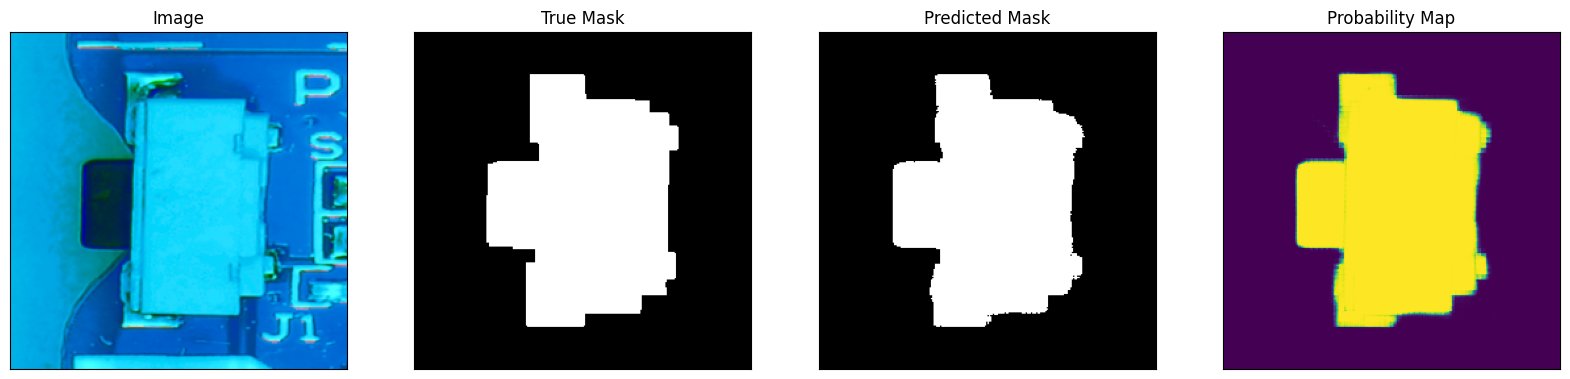

In [45]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Let's take a random training example
idx = random.randint(0, filtered_images.shape[0]-1)

# Load image
test_image = dataset[idx]["image"]

# Convert grayscale image to RGB
# test_image = test_image.convert("RGB")

# Get box prompt based on ground truth segmentation map
ground_truth_mask = np.array(dataset[idx]["label"])
prompt = get_bounding_box(ground_truth_mask)

# Prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU and convert to float32
inputs = {k: v.float().to(device) for k, v in inputs.items()}

my_pcb_model.eval()

# Forward pass
with torch.no_grad():
    outputs = my_pcb_model(**inputs, multimask_output=False)

# Apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))

# Convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.8).astype(np.uint8)

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth_mask.flatten(), medsam_seg.flatten())
recall = recall_score(ground_truth_mask.flatten(), medsam_seg.flatten())
f1 = f1_score(ground_truth_mask.flatten(), medsam_seg.flatten())

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting the results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot the image
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the image is grayscale
axes[0].set_title("Image")

# Plot the true mask
axes[1].imshow(ground_truth_mask, cmap='gray')  # True mask
axes[1].set_title("True Mask")

# Plot the predicted mask
axes[2].imshow(medsam_seg, cmap='gray')  # Predicted mask
axes[2].set_title("Predicted Mask")

# Plot the probability map
axes[3].imshow(medsam_seg_prob)  # Probability map
axes[3].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()
